# Pandas

Pandas is a fast, powerful, flexible and easy to use open-source data analysis and data manipulation library built on top of the Python programming language. It is a fundamental high-level building block for doing practical, real-world data analysis in Python.

## Documentation

You can find the documentation for Pandas [here](https://pandas.pydata.org/docs/).

## Installation

You can install Pandas using the following command:

```bash
pip install pandas
```

Note, there are extra optional dependencies that you can install using the following command:

```bash
pip install pandas[all]
```

For full list of installation options, please refer to the [documentation](https://pandas.pydata.org/docs/getting_started/install.html).

In [ ]:
# Let's check our Pandas version and see if it is installed at all

try:
    import pandas as pd  # Pandas often uses pd as an alias, extremely common
    print("Pandas version: ", pd.__version__)
except ImportError:
    print("Pandas is not installed")
    print("Please install it using: pip install pandas")


Pandas version:  2.2.3


In [ ]:
# if we are using Jupyter we can install pandas using the following command
# !pip install pandas - note the exclamation mark at the beginning of the command
# ! means run the command in the shell - like in the terminal


In [2]:
# !pip install pandas
# above needs to be run only once, after that you can comment it out

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading CSV file with Pandas

```python

In [5]:
# let's load dice_rolls.csv file into a DataFrame
df = pd.read_csv('dice_rolls.csv')
# let's see the first 10 rows of the DataFrame
df.head(10) #default is 5 rows, but you can specify the number of rows you want to see

,summa,biezums
0,6,13
1,7,128
2,8,437
3,9,1198
4,10,2642
5,11,5442
6,12,9758
7,13,16145
8,14,24981
9,15,35358


In [10]:
# let's see the shape of our DataFrame
print("Shape of the DataFrame: ", df.shape)

Shape of the DataFrame:  (31, 2)


In [7]:
# let's find out what columns we have in the DataFrame
print(f"Columns in the DataFrame: {df.columns}")

Columns in the DataFrame: Index(['summa', 'biezums'], dtype='object')


<Axes: xlabel='summa'>

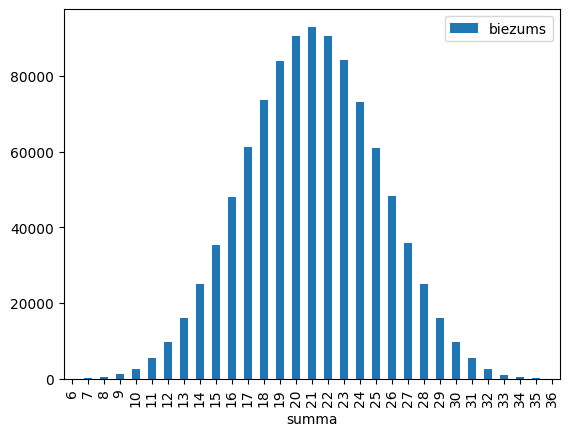

In [ ]:
# I can plot the two columns of the DataFrame as a bar chart
df.plot(kind='bar', x='summa', y='biezums')
# by default Pandas uses matplotlib to plot the data
# you can change the plotting library to other libraries like Plotly, Bokeh, etc.

## Simple statistics
```python

In [9]:
# let's use describe method to get some statistics about the DataFrame
df.describe()

,summa,biezums
count,31.000000,31.000000
mean,21.000000,32258.064516
std,9.092121,33825.091793
min,6.000000,12.000000
25%,13.500000,1920.000000
50%,21.000000,16145.000000
75%,28.500000,61129.500000
max,36.000000,92943.000000


In [12]:
# let's add a new column to the DataFrame
# it will hold a string of Dice Number
# for exaple Dice_6, Dice_8, Dice_10, etc.
# so we use existing column summa (representing dice numbers added) and add Dice_ to it
df['Dice Number'] = 'Dice_' + df['summa'].astype(str) # we convert the dice column to string
# let's see the last 7 rows of the DataFrame
df.tail(7) # default is 5 rows, but you can specify the number of rows you want to see

,summa,biezums,Dice Number
24,30,9742,Dice_30
25,31,5471,Dice_31
26,32,2684,Dice_32
27,33,1145,Dice_33
28,34,473,Dice_34
29,35,159,Dice_35
30,36,12,Dice_36


In [13]:
# now we can see the shape
print("Shape of the DataFrame: ", df.shape)

Shape of the DataFrame:  (31, 3)


In [14]:
# now when we do describe let's add all flag for non-numeric columns
df.describe(include='all') # string columns are then included in the statistics


,summa,biezums,Dice Number
count,31.000000,31.000000,31
unique,NaN,NaN,31
top,NaN,NaN,Dice_6
freq,NaN,NaN,1
mean,21.000000,32258.064516,NaN
std,9.092121,33825.091793,NaN
min,6.000000,12.000000,NaN
25%,13.500000,1920.000000,NaN
50%,21.000000,16145.000000,NaN
75%,28.500000,61129.500000,NaN


In [15]:
# i might want to have the column be index
df.set_index('Dice Number', inplace=True) # note inplace=True means that the change is done in place
# if I wanted to save to new DataFrame I would do df2 = df.set_index('Dice Number')
# pandas methods uses this approach frequently, we have a choice of inplace or not
df.head()

,summa,biezums
Dice Number,,
Dice_6,6,13
Dice_7,7,128
Dice_8,8,437
Dice_9,9,1198
Dice_10,10,2642


In [16]:
# let's get our data info
df.info() # shows what columns we have, how many non-null values we have, and the data types

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Dice_6 to Dice_36
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   summa    31 non-null     int64
 1   biezums  31 non-null     int64
dtypes: int64(2)
memory usage: 744.0+ bytes


In [17]:
# let's see some row specifically
df.loc['Dice_6'] # this will show the row with index Dice_6

summa       6
biezums    13
Name: Dice_6, dtype: int64

In [18]:
# i can also look up rows by numerical index using iloc
df.iloc[0] # this will show the first row of the DataFrame

summa       6
biezums    13
Name: Dice_6, dtype: int64

In [19]:
# I can save the data to a new CSV file
# df.to_csv('dice_rolls_new.csv', index=False)
# index=False means that we don't want to save the index column
# let's use index
df.to_csv('dice_rolls_new.csv', index=True)

In [20]:
# Pandas let's us work on columns all at once
# for example let's make a new column where we add 100 to each value in the summa column
df['summa_plus_100'] = df['summa'] + 100 # we could use multiplication, division, etc.
# we could also combine multiple columns
df.head()

,summa,biezums,summa_plus_100
Dice Number,,,
Dice_6,6,13,106
Dice_7,7,128,107
Dice_8,8,437,108
Dice_9,9,1198,109
Dice_10,10,2642,110


In [21]:
# often in pandas we want to modify some specific values
# let's modify biezums column by multiplying it by 2
# but we only want those rows where summa is greater or equal than 7 and less than 9
df.loc[(df['summa'] >= 7) & (df['summa'] < 9), 'biezums'] = df['biezums'] * 2

# let's see the first 5 rows of the DataFrame
df.head()
# we can see that rows where summa is 7 and 8 have doubled the biezums value

,summa,biezums,summa_plus_100
Dice Number,,,
Dice_6,6,13,106
Dice_7,7,256,107
Dice_8,8,874,108
Dice_9,9,1198,109
Dice_10,10,2642,110
